In [21]:
import sys; sys.path.insert(0,"/home/ubuntu/fastai-fork/")

In [22]:
from fastai.vision import *

In [3]:
camvid = untar_data(URLs.CAMVID_TINY)
path_lbl = camvid/'labels'
path_img = camvid/'images'

In [4]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [5]:
data = (SegmentationItemList.from_folder(path_img)
        .split_by_rand_pct()
        .label_from_func(get_y_fn, classes=codes)
        .transform(get_transforms(), tfm_y=True, size=128)
        .databunch(bs=16, path=camvid)
        .normalize(imagenet_stats))

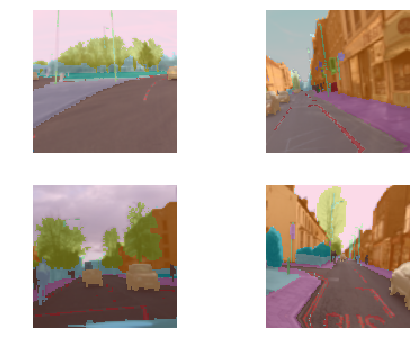

In [6]:
data.show_batch(rows=2, figsize=(7,5))

In [7]:
learn = unet_learner(data, models.resnet18)
learn.fit_one_cycle(40,1e-2)
learn.save('mini_train')

epoch,train_loss,valid_loss,time
0,3.054234,2.141034,00:17
1,2.492053,1.918916,00:02
2,2.201909,1.414244,00:02
3,1.974899,1.303436,00:02
4,1.794770,1.258970,00:02
5,1.664533,1.157477,00:02
6,1.610258,2.012271,00:02
7,1.685088,1.948394,00:02
8,1.701996,1.937662,00:02
9,1.732290,1.760366,00:02


In [23]:
from fastai.vision.interpret import SegmentationInterpretation

In [24]:
learn.data.classes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [25]:
interp=SegmentationInterpretation.from_learner(learn)

In [26]:
top_losses, top_idxs=interp.top_losses((128,128))

In [27]:
top_losses, top_idxs

(tensor([1.4029, 1.3684, 1.2277, 1.1778, 1.1540, 1.1009, 1.0991, 1.0207, 0.9936,
         0.9648, 0.9390, 0.8775, 0.8577, 0.8009, 0.7803, 0.7440, 0.7188, 0.6388,
         0.5481, 0.4954]),
 tensor([10, 12, 14,  4,  5,  1, 18,  3,  0, 17, 11, 19,  2,  9,  7, 13, 15,  6,
         16,  8]))

In [28]:
# # if more than 20 classes are given then all the additional classes will be mapped to some existing color
# classes = ['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
# 'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
# 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock', 'Road']

In [29]:
classes = ['Car', 'Bicyclist', 'Fence', 'Road', 'Sidewalk', 'Tree']

tensor(1.4029)


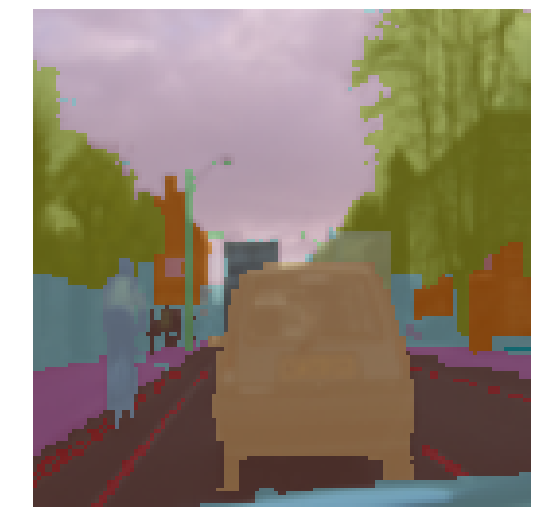

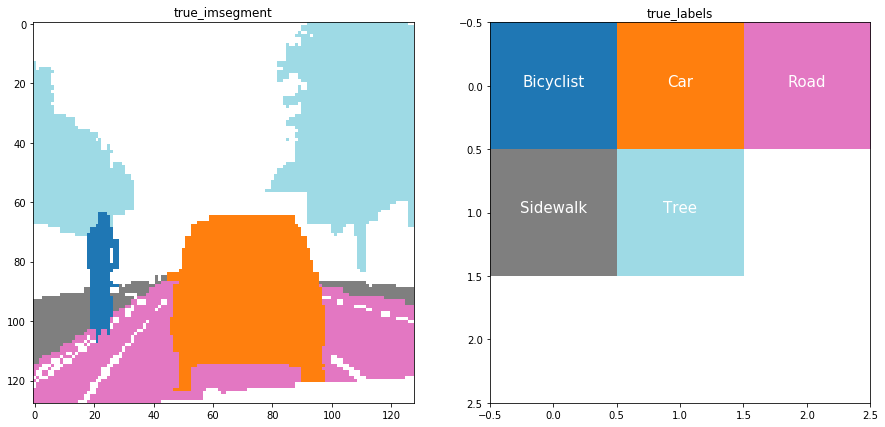

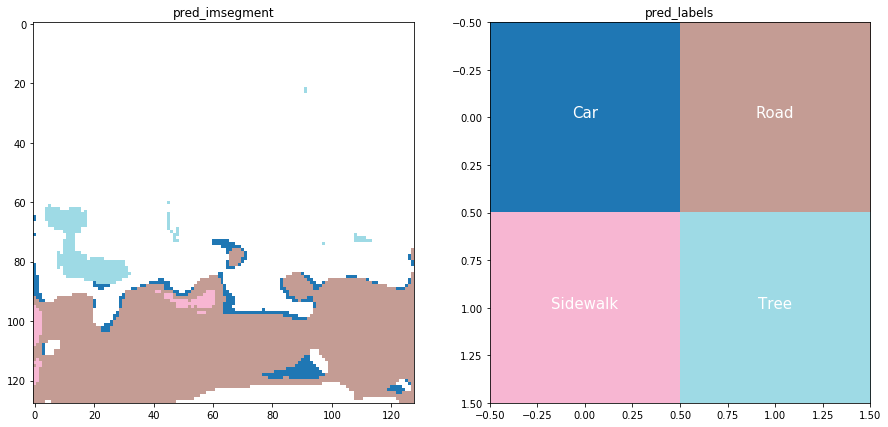

In [32]:
# show top loss
print(top_losses[0])
interp.show_xyz(top_idxs[0], classes, sz=15)